In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("united_filtered.csv", sep=';')
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,https://www.cian.ru/sale/flat/306341805/,Москва,sale,flat,5,12,4,184.7,460790000.0,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/297733877/,Москва,sale,flat,80,85,4,294.6,412440000.0,Пресненский,Московский международный деловой центр Москва-...,NaN,Деловой центр,NaN
2,VESPER,developer,https://www.cian.ru/sale/flat/306541543/,Москва,sale,flat,18,21,4,234.3,328184010.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
3,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/293126875/,Москва,sale,flat,21,23,4,244.1,78000000.0,Хорошевский,Гризодубовой,2,ЦСКА,Гранд-парк
4,Sminex,developer,https://www.cian.ru/sale/flat/303408628/,Москва,sale,flat,5,14,4,198.4,557450000.0,Якиманка,NaN,NaN,Полянка,Лаврушинский ЖК
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88942,Владис,real_estate_agent,https://www.cian.ru/sale/flat/307447309/,Москва,sale,flat,9,43,1,33.5,13300000.0,Покровское-Стрешнево,Строительный проезд,9С9,Трикотажная,Sky Garden
88943,БЕСТ-Недвижимость на Баррикадной,real_estate_agent,https://www.cian.ru/sale/flat/303655807/,Москва,sale,flat,10,16,1,33.0,9500000.0,Молжаниновский,Ленинградское шоссе,229Ак1,Новоподрезково,Молжаниново
88944,Владис,real_estate_agent,https://www.cian.ru/sale/flat/306283234/,Москва,sale,flat,7,10,1,33.3,9500000.0,NaN,NaN,2.4,Потапово,Дзен-кварталы ЖК
88945,Департамент города Москвы по конкурентной поли...,real_estate_agent,https://www.cian.ru/sale/flat/304957475/,Москва,sale,flat,8,33,1,33.2,10065000.0,Ховрино,Клинская,2Ак7,Грачёвская,мой адрес На Клинской


In [ ]:
df_filtered = df.drop(['author','author_type','url','location','deal_type','accommodation_type'],axis=1)

In [ ]:
df_filtered = df_filtered.drop_duplicates() #удаляем дубликаты

<Axes: ylabel='price'>

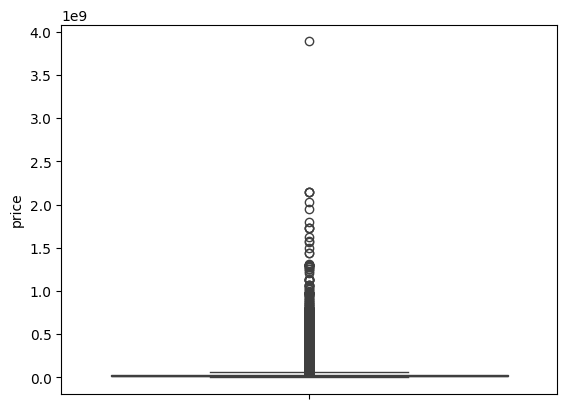

In [ ]:
sns.boxplot(y=df_filtered['price'])

In [ ]:
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)
IQR = Q3 - Q1

h = Q3 + 1.5 * IQR
l = Q1 - 1.5 * IQR

df_filtered = df_filtered[df_filtered['price'].between(l, h)]

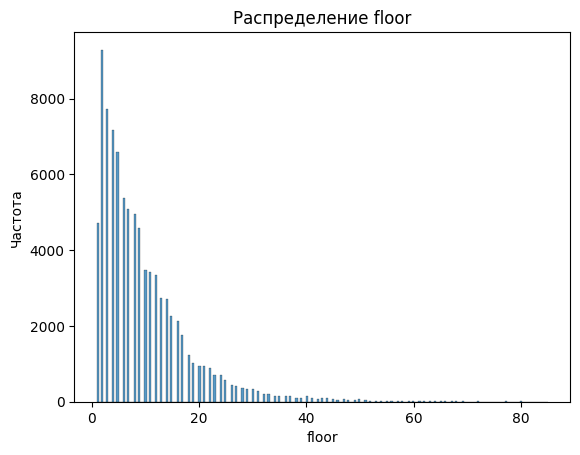

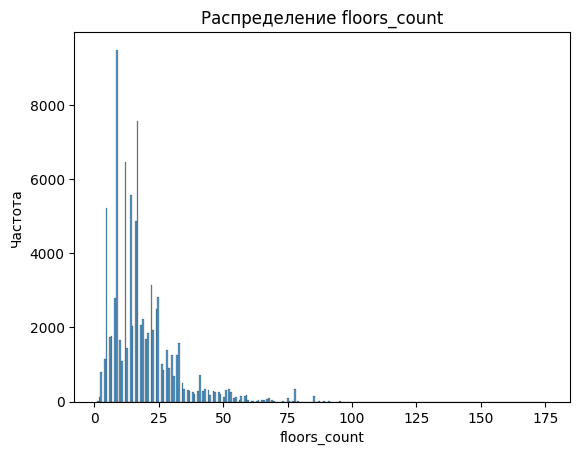

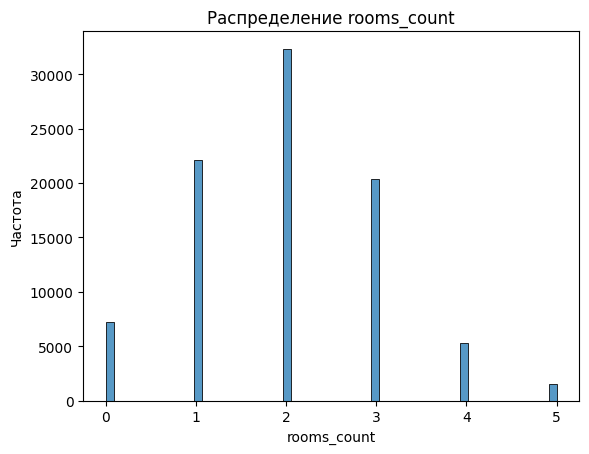

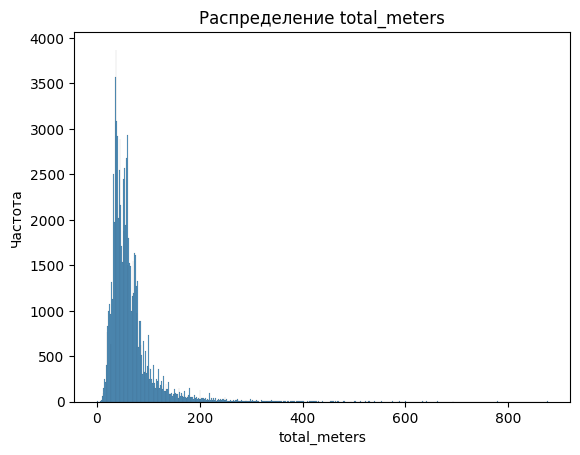

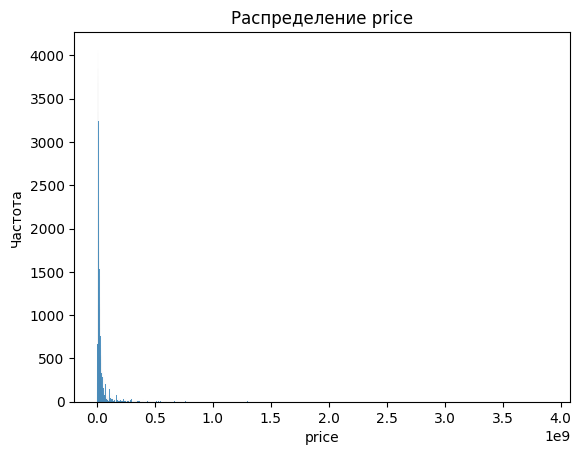

In [ ]:
numerical_columns = df_filtered.select_dtypes(include=['int64', 'float64']).columns

for numerical_column in numerical_columns:
    plt.title(f'Распределение {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Частота')
    sns.histplot(df[numerical_column])
    plt.show()

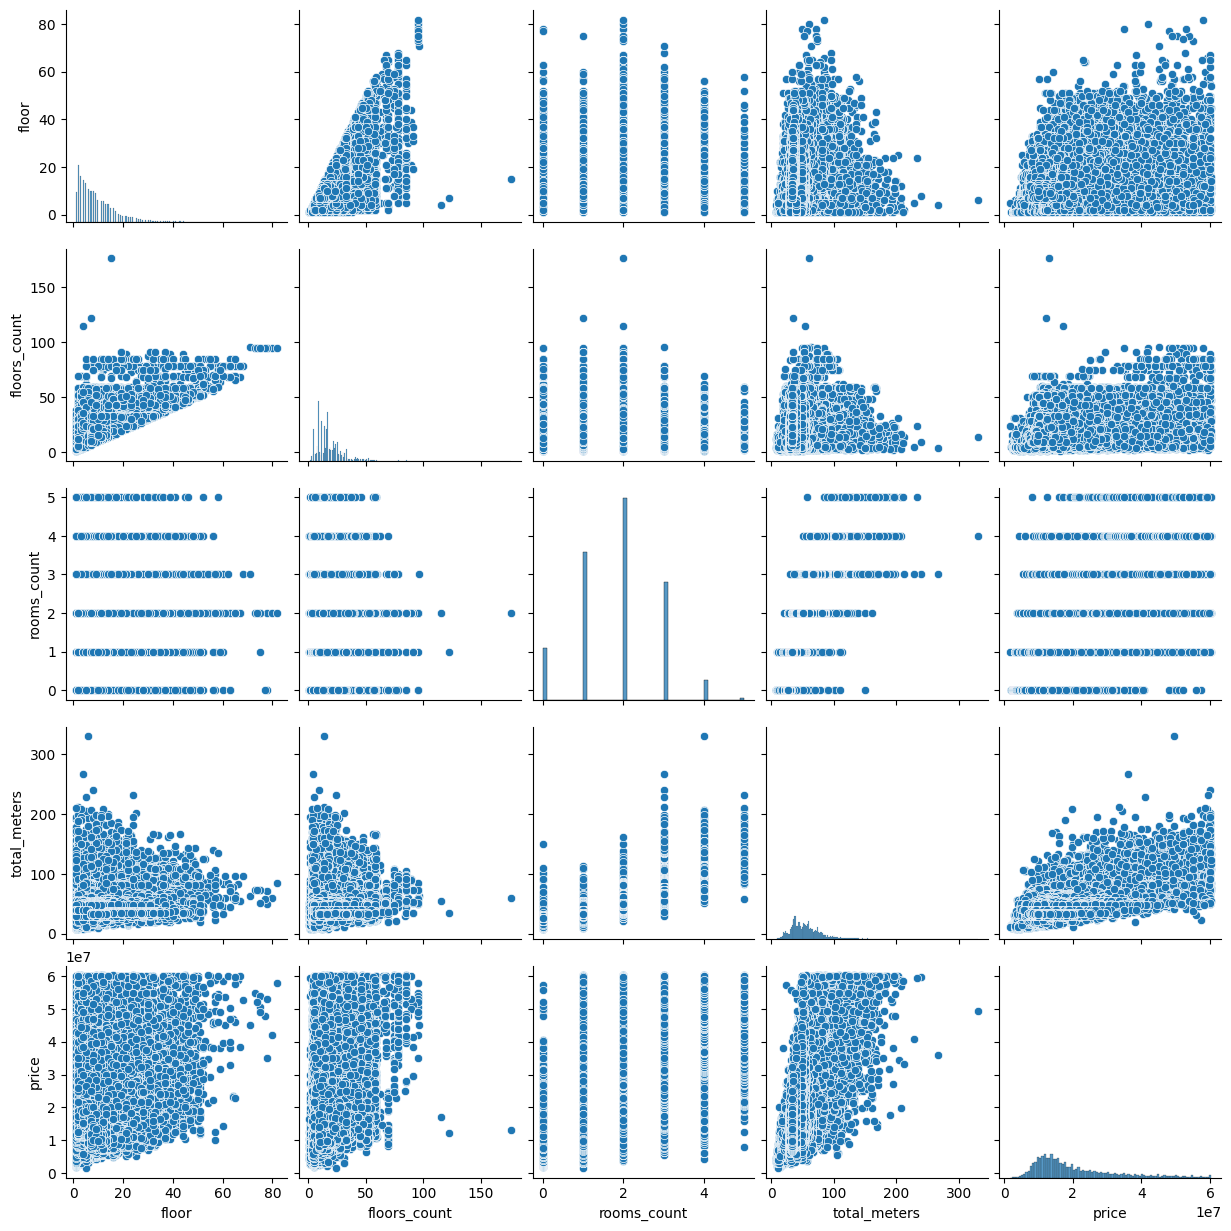

In [ ]:
sns.pairplot(df_filtered)

In [ ]:
correlation_matrix = df_filtered.corr(numeric_only=True)
correlation_matrix

,floor,floors_count,rooms_count,total_meters,price
floor,1.000000,0.630427,0.020492,0.098782,0.225210
floors_count,0.630427,1.000000,-0.007355,0.114430,0.308180
rooms_count,0.020492,-0.007355,1.000000,0.837254,0.558692
total_meters,0.098782,0.114430,0.837254,1.000000,0.734292
price,0.225210,0.308180,0.558692,0.734292,1.000000


<Axes: >

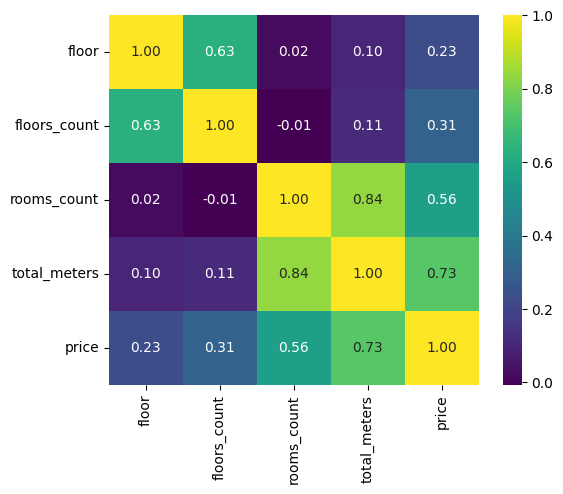

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)

<Axes: xlabel='total_meters', ylabel='price'>

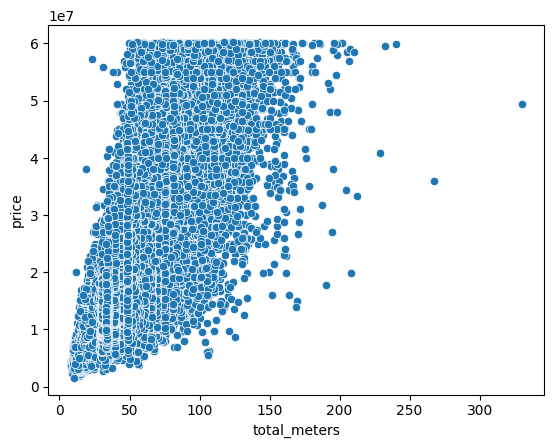

In [ ]:
sns.scatterplot(data=df_filtered, x='total_meters', y='price')

In [ ]:
df_filtered.groupby(['rooms_count']).agg(
    avg_price=('price', lambda x: x.mean() / 1_000_000)
)

,avg_price
rooms_count,
0,10.352960
1,14.088143
2,20.748672
3,27.580850
4,37.353805
5,39.768461
